# **Final Project**, BAIT509 Winter 2023
**Business Applications of Machine Learning [100 Marks]**

**Deadline: Thursday, February 9th @ 11:59pm**

**Academic Integrity**

This is a group project. Do not share your code with other groups, or post any parts of your work online. You can only submit code that is produced by your group. If you use any online resource for developing parts of your code, you must explicitly acknowledge the source in a comment in your code. Students suspected of plagiarism on the project will be referred to the university for formal discipline according to the regulations.

**Please note that late submissions receive a mark of 0 as per course outline and RHL regulations.**

Please fill out the following:

• Full Names of all Group members: Cherry Nguyen, Thien Nguyen


• Student Numbers of all Group member: 18921221, 76697648


• Group number (from Canvas): 23


**Two submission files are required per group:**

For submitting this project, two files must be submitted on Canvas by the project deadline:

1) The complete Jupyter file (in .ipynb format) (that completely compiles on Google colab without any errors independent of the computer used.)

2) A self-contained and complete pdf printout of the same Jupyter file with all the output printed as well as all the code, text cells, comments, and figures.

**Policy regarding the use of AI assistant tools**

If you use ChatGPT (or a similar tool) to get ideas and/or partial answers for this project or to generate any text, you must declare that you have used it, with a couple sentences describing the extent to which it was used, and you must save any generated text from this tool in case it is requested.

You will not be penalized for using such AI assistant tools, but the TA or the instructor may ask you to provide the generated text in order to help with grading decisions. In this case, your (or your group's) original contributions will be evaluated. Failure to fully declare the use of this tool will be considered "unauthorized" (See 3.b of the [Vancouver Academic Calendar](https://www.calendar.ubc.ca/vancouver/index.cfm?tree=3,54,111,1745))

## **Part 0: Loading the libraries and the data [0 Marks]**


In this project, we want to develop a statistical model for the mortality rate of lung cancer in the United States.

One of the parts overlooked in many machine learning projects is preprocessing. And a good way to learn it is by solving a lot of examples and test cases. A big part of this project is walking you through preprocessing, making informed decisions using your observations, and exploratory data analysis. Then we use supervised learning methods to construct models to predict the mortality rate of lung cancer using the features provided here.

In [ ]:
# data wrangling tools
import pandas as pd
import numpy as np


# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistical learning
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn import tree

! pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

! pip install shap
import shap 

import random

%matplotlib inline


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.5 MB/s eta 0:00:00



## Loading data
Load the three csv files as pandas dataframes directly from their URLs.

In [ ]:
fulldf = pd.read_csv('https://saref.github.io/teaching/BAIT509/mydata.csv').drop(columns='Unnamed: 0')
data_dict = pd.read_csv('https://saref.github.io/teaching/BAIT509/descriptions.csv')
populationdf = pd.read_csv('https://saref.github.io/teaching/BAIT509/populations.csv').drop(columns='Unnamed: 0')

Data set `mydata.csv` includes most of the data. Explanations on the meaning of each of the columns are included in `descriptions.csv`. Please take your time to understand the three dataframes before proceeding.

## **Part 1: Getting started [40 Marks]**

In [ ]:
data_dict

,Unnamed: 0,Feature,Definition,Notes
0,0,State,NaN,NaN
1,1,AreaName,NaN,NaN
2,2,All_Poverty,Both male and female reported below poverty li...,NaN
3,3,M_Poverty,Males below poverty (Raw),NaN
4,4,F_Poverty,Females below poverty (Raw),NaN
5,5,FIPS,State + County FIPS (Raw),NaN
6,6,Med_Income,Med_Income all enthnicities (Raw),NaN
7,7,Med_Income_White,Med_Income white (Raw),NaN
8,8,Med_Income_Black,Med_Income black (Raw),NaN
9,9,Med_Income_Nat_Am,Med_Income native American (Raw),NaN


In [ ]:
print(fulldf.info())
fulldf.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                3134 non-null   object 
 1   AreaName             3134 non-null   object 
 2   All_Poverty          3134 non-null   int64  
 3   M_Poverty            3134 non-null   int64  
 4   F_Poverty            3134 non-null   int64  
 5   FIPS                 3134 non-null   int64  
 6   Med_Income           3133 non-null   float64
 7   Med_Income_White     3132 non-null   float64
 8   Med_Income_Black     1924 non-null   float64
 9   Med_Income_Nat_Am    1474 non-null   float64
 10  Med_Income_Asian     1377 non-null   float64
 11  Med_Income_Hispanic  2453 non-null   float64
 12  M_With               3134 non-null   int64  
 13  M_Without            3134 non-null   int64  
 14  F_With               3134 non-null   int64  
 15  F_Without            3134 non-null   i

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,...,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths
2952,WA,"Cowlitz County, Washington",17609,8049,9560,53015,47452.0,48750.0,31250.0,30784.0,...,6096,46637,4793,90441,10889,66.3,88,stable,53.9,71
2772,UT,"Cache County, Utah",17713,8262,9451,49005,50497.0,51159.0,NaN,23878.0,...,6142,53168,5493,105080,11635,15.8,12,stable,9.2,7
286,CO,"Phillips County, Colorado",658,293,365,8095,43639.0,43417.0,NaN,12750.0,...,309,1816,268,3729,577,53,4,stable,*,*
1230,MI,"Arenac County, Michigan",3013,1512,1501,26011,38307.0,38308.0,NaN,NaN,...,977,6890,630,13648,1607,104.9 #,27,stable,83.8,21
2157,OK,"Jackson County, Oklahoma",4276,1665,2611,40065,41560.0,44890.0,30684.0,36702.0,...,1887,10682,2080,20493,3967,58.6,17,stable,58.6,17
2429,TN,"Carroll County, Tennessee",5713,2656,3057,47017,35508.0,37429.0,21433.0,40625.0,...,1745,12746,1520,24607,3265,80,32,stable,61,25
2190,OK,"Rogers County, Oklahoma",8271,3365,4906,40131,58139.0,59876.0,55625.0,49853.0,...,5648,39145,5424,77149,11072,62.8,64,stable,49.2,49
2032,NY,"Washington County, New York",8004,3581,4423,36115,51143.0,51109.0,NaN,39063.0,...,3041,27667,2246,54432,5287,88.7,71,falling,63.1,50
1124,LA,"East Carroll Parish, Louisiana",2903,1374,1529,22035,21099.0,42083.0,16364.0,NaN,...,704,2549,627,4733,1331,98,8,stable,72.6,6
2539,TX,"Brooks County, Texas",2726,1476,1250,48047,22741.0,22103.0,NaN,NaN,...,1150,2526,887,4861,2037,*,3 or fewer,*,*,*


In [ ]:
print(populationdf.info())
populationdf.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   POPESTIMATE2015  3193 non-null   int64
 1   STATE            3193 non-null   int64
 2   COUNTY           3193 non-null   int64
dtypes: int64(3)
memory usage: 75.0 KB
None


,POPESTIMATE2015,STATE,COUNTY
3072,18109,51,175
3079,54591,51,191
367,8331,12,77
1986,94352,37,125
2846,10160,48,315
845,10974,19,81
2024,756927,38,0
1099,31183,21,177
2632,32147,47,79
2635,18135,47,85


## Data cleaning
In this project, we go through specific data cleaning steps. Please read through the instructions carefully.


### 1.1 Convert `FIPS` column to correct format [5 Marks]
Federal Information Processing Standard or [FIPS](https://en.wikipedia.org/wiki/FIPS_county_code) is a categorical variable. It is a code with five digits. The left two digits showing the state and the three right digits showing the county code. We recognize that desipite being a number, FIPS is actually a categorical variable.
First, check the format of the `FIPS` column and convert them to the five digit format with type `np.object_` as seen in the county level section, [here](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt#:~:text=county%2Dlevel%20%20%20%20%20%20place). 

*Hint*: You can use [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) to first convert the type and then use [`str.pad`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.pad.html) to format the values as five digit numbers.

In [ ]:
#Convert FIPS values to 'object'
fulldf.FIPS = fulldf.FIPS.astype(str)

#Reformat FIPS values to standard
fulldf.FIPS = fulldf.FIPS.str.pad(width=5,side='left',fillchar='0')
print(fulldf.FIPS.sample())

1945    35037
Name: FIPS, dtype: object


### 1.2 Check for null values [5 Marks]

Just check for null values and remove columns whenever the percentage of null values is greater than 20. Please briefly justify your choices w.r.t. the columns you have removed.

In [ ]:
#Count null values for each column
null_vals = fulldf.isnull().sum() 

#Calculate percentage of null values for each column
null_per = round((null_vals/fulldf.shape[0])*100,2)
print(null_per)

State                   0.00
AreaName                0.00
All_Poverty             0.00
M_Poverty               0.00
F_Poverty               0.00
FIPS                    0.00
Med_Income              0.03
Med_Income_White        0.06
Med_Income_Black       38.61
Med_Income_Nat_Am      52.97
Med_Income_Asian       56.06
Med_Income_Hispanic    21.73
M_With                  0.00
M_Without               0.00
F_With                  0.00
F_Without               0.00
All_With                0.00
All_Without             0.00
Incidence_Rate          0.00
Avg_Ann_Incidence       0.00
Recent_Trend            0.00
Mortality_Rate          0.00
Avg_Ann_Deaths          0.00
dtype: float64


Most race-based median income features have more than 20% values missing. This is understandable since minorities seems to be under-accounted for in many US reports. We decide to remove those columns because these could lead to racial bias if we buid a model based on them. Med_Income_White is also removed to protect racial equality even though most of its data are available.

In [ ]:
#Drop racial income columns
nonnulldf = fulldf.drop(['Med_Income_White','Med_Income_Black','Med_Income_Nat_Am','Med_Income_Asian','Med_Income_Hispanic'],axis=1)

print('The remaining columns are:')
for i in pd.Series(nonnulldf.columns):
    print(i)

The remaining columns are:
State
AreaName
All_Poverty
M_Poverty
F_Poverty
FIPS
Med_Income
M_With
M_Without
F_With
F_Without
All_With
All_Without
Incidence_Rate
Avg_Ann_Incidence
Recent_Trend
Mortality_Rate
Avg_Ann_Deaths


### 1.3 Check the format of columns [5 Marks]
Report the format of each column. List the columns that are in an unexpected format and state why you think that is the case.

*Hint*: You can do this by either inspecting the dataframe or by writing a code snippet that tells you what cells cannot be reformatted to the correct format. The Titatinc Jupyter file that we covered in class may also give you some useful ideas.

In [ ]:
nonnulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3134 non-null   object 
 1   AreaName           3134 non-null   object 
 2   All_Poverty        3134 non-null   int64  
 3   M_Poverty          3134 non-null   int64  
 4   F_Poverty          3134 non-null   int64  
 5   FIPS               3134 non-null   object 
 6   Med_Income         3133 non-null   float64
 7   M_With             3134 non-null   int64  
 8   M_Without          3134 non-null   int64  
 9   F_With             3134 non-null   int64  
 10  F_Without          3134 non-null   int64  
 11  All_With           3134 non-null   int64  
 12  All_Without        3134 non-null   int64  
 13  Incidence_Rate     3134 non-null   object 
 14  Avg_Ann_Incidence  3134 non-null   object 
 15  Recent_Trend       3134 non-null   object 
 16  Mortality_Rate     3134 

In [ ]:
# Use ChatGPT to get the except clause ValueError so I can print out the column names that cannot be reformatted 
column_list = {'Incidence_Rate', 'Avg_Ann_Incidence', 'Recent_Trend', 'Mortality_Rate', 'Avg_Ann_Deaths'}
for col in column_list:
    try:
        fulldf[col] = fulldf[col].astype(float)
    except ValueError as e:
        print(f'{col} cannot be reformatted to the correct format.')

Incidence_Rate cannot be reformatted to the correct format.
Recent_Trend cannot be reformatted to the correct format.
Avg_Ann_Deaths cannot be reformatted to the correct format.
Mortality_Rate cannot be reformatted to the correct format.
Avg_Ann_Incidence cannot be reformatted to the correct format.


In [ ]:
for col in column_list:
  print(f'{col} has the following unique values: {sorted(fulldf[col].unique())}')

Incidence_Rate has the following unique values: ['*', '100', '100.1', '100.2', '100.3', '100.4', '100.5', '100.7', '100.8', '100.9', '101.2', '101.4', '101.5', '101.7', '102', '102.4', '102.6', '102.7', '102.8', '102.9', '103', '103.1', '103.3', '103.4', '103.5', '103.6', '103.9', '104', '104.4', '104.6', '104.7', '104.9 #', '105.5', '105.7', '105.9', '106', '106.2', '106.4', '106.5', '106.8', '106.9', '107.3', '107.4', '107.7', '108.5', '108.6', '108.7', '109', '109.1', '109.2', '109.3', '109.7', '110', '110.1', '110.2', '110.8', '111.5', '111.7', '111.8', '112.4', '112.6', '112.7', '113', '113.1', '113.2', '113.9', '114', '114.1', '114.2', '114.5', '114.7', '114.9', '115.7', '116', '116.1', '117.7', '118.1', '118.3', '118.5', '118.6', '120.6', '120.7', '122.4', '123', '123.2', '123.7', '124.6', '124.8', '125', '127.6', '127.9', '129.7', '13.5', '139.7', '14.8', '145.1', '148.1', '149.4', '15.8', '151.8', '152.9', '153.4', '157.5', '167', '18.2', '18.5', '20.4', '203.7', '22.6', '22.9

These features cannot be reformated because they may have non-numerical values that represents missing or error data. 

### 1.4 Merge the population data to the main dataframe [5 Marks]
You already know about FIPS. You can use the state and county columns in this dataset to construct a FIPS column in the population dataframe in the same format as the main dataframe. Then merge the population data to the main dataframe. It is up to you to decide the type of merge and whether it is done properly.

In [ ]:
print(populationdf.info())
print(populationdf.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   POPESTIMATE2015  3193 non-null   int64
 1   STATE            3193 non-null   int64
 2   COUNTY           3193 non-null   int64
dtypes: int64(3)
memory usage: 75.0 KB
None
      POPESTIMATE2015  STATE  COUNTY
1469            59710     28      87
2047           104236     54      61
2027             6753     38       5
2915          1176558     48     453
1916           180143     36     111
70              53159      4       7
2905             1410     48     433
794             15692     18     165
59               8863      2     220
1085             9512     21     149


In [ ]:
#Reformat and create FIPS column
populationdf.STATE = populationdf.STATE.astype(str)
populationdf.STATE = populationdf.STATE.str.pad(width=2,side='left',fillchar='0')
populationdf.COUNTY = populationdf.COUNTY.astype(str)
populationdf.COUNTY = populationdf.COUNTY.str.pad(width=3,side='left',fillchar='0')
populationdf['FIPS'] = populationdf.STATE + populationdf.COUNTY
print(populationdf.sample(10))

      POPESTIMATE2015 STATE COUNTY   FIPS
1459            68215    28    067  28067
1052            37421    21    083  21083
1092            27924    21    163  21163
1249           696023    25    021  25021
3065            94409    51    161  51161
846             17367    19    083  19083
736             20315    18    049  18049
1077            23123    21    133  21133
2222            75550    39    043  39043
117              9652    01    105  01105


In [ ]:
#Merge datasets
fullpopdf = nonnulldf.set_index('FIPS').join(populationdf.set_index('FIPS')).drop(['STATE','COUNTY'],axis=1)
fullpopdf = fullpopdf.reset_index()
print(fullpopdf.sample(10))

       FIPS State                        AreaName  All_Poverty  M_Poverty  \
1228  26007    MI         Alpena County, Michigan         4898       2193   
2554  48077    TX              Clay County, Texas         1246        620   
1086  21199    KY        Pulaski County, Kentucky        16497       7900   
3077  54043    WV   Lincoln County, West Virginia         5870       2758   
2708  48385    TX              Real County, Texas          541        242   
2734  48437    TX           Swisher County, Texas         1595        708   
266   08055    CO       Huerfano County, Colorado         1171        646   
2673  48315    TX            Marion County, Texas         2264        742   
1573  28127    MS     Simpson County, Mississippi         6985       3372   
3072  54033    WV  Harrison County, West Virginia        11072       4992   

      F_Poverty  Med_Income  M_With  M_Without  F_With  F_Without  All_With  \
1228       2705     38829.0   12241       1820   13037       1605     252

### 1.5 Cleaning the output (response) column `Mortality_Rate` [10 Marks]
Using the file `descriptions.csv`, explain what the non-numerical values of `Mortality_Rate` mean. 

Then, it is decision making time, we have to decide whether to remove the non-numerical values from `Mortality_Rate` or to assign a specific numerical value to them. This decision is based on you inferring if the non-numerical values were caused by error in data gathering or not. 

Note that if the observations are valid and are deleted, we are adding a bias to the model.

*Hint*: To get the full mark for this part, conduct multiple relevant exploratory data analyses. Then use them to support your decision on removing or modifying the non-numerical values. Your choice results in full mark if the supporting analysis and arguments are deemed adequate and convincing.

In [ ]:
data_dict

,Unnamed: 0,Feature,Definition,Notes
0,0,State,NaN,NaN
1,1,AreaName,NaN,NaN
2,2,All_Poverty,Both male and female reported below poverty li...,NaN
3,3,M_Poverty,Males below poverty (Raw),NaN
4,4,F_Poverty,Females below poverty (Raw),NaN
5,5,FIPS,State + County FIPS (Raw),NaN
6,6,Med_Income,Med_Income all enthnicities (Raw),NaN
7,7,Med_Income_White,Med_Income white (Raw),NaN
8,8,Med_Income_Black,Med_Income black (Raw),NaN
9,9,Med_Income_Nat_Am,Med_Income native American (Raw),NaN


The non-numerical values of Mortality_Rate mean that we have fewer than 16 reported cases of lung cancer mortality per 100,000 people. 

In [ ]:
df = fullpopdf.loc[:, ['Incidence_Rate', 'Avg_Ann_Incidence', 'Mortality_Rate', 'Avg_Ann_Deaths', 'POPESTIMATE2015']]
df.sample(20)

,Incidence_Rate,Avg_Ann_Incidence,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015
2940,59.4,23,48.5,19,27100
479,66.8,19,54,15,21190
1417,95.2,9,67.8,7,6801
2734,49.7,5,36.7,4,7533
2924,71.5,24,51,17,25432
2441,91.3,22,71.9,17,19182
949,_,_,*,*,3005
746,79.5,52,59.9,39,46045
583,55.6,9,51.9,9,10676
984,_,_,36.5,5,8856


In [ ]:
fullpopdf[fullpopdf['State'] == 'MN'].loc[:,['State','Incidence_Rate',	'Avg_Ann_Incidence',	'Recent_Trend',	'Mortality_Rate','Avg_Ann_Deaths',	'POPESTIMATE2015']]

,State,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015
1308,MN,_,_,_,40.3,13,15702
1309,MN,_,_,_,48.4,145,344151
1310,MN,_,_,_,46.1,21,33386
1311,MN,_,_,_,41.3,20,45672
1312,MN,_,_,_,38.8,15,39710
...,...,...,...,...,...,...,...
1390,MN,_,_,_,46.5,8,10952
1391,MN,_,_,_,*,*,6396
1392,MN,_,_,_,37.8,22,50885
1393,MN,_,_,_,42.5,44,131311


In [ ]:
fullpopdf[fullpopdf['State'] == 'NV'].loc[:,['State','Incidence_Rate',	'Avg_Ann_Incidence',	'Recent_Trend',	'Mortality_Rate','Avg_Ann_Deaths',	'POPESTIMATE2015']]

,State,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015
1958,NV,__,__,__,59.9,18,24200
1959,NV,__,__,__,48.1,901,2114801
1960,NV,__,__,__,40.9,32,47710
1961,NV,__,__,__,39.9,15,51935
1962,NV,__,__,__,*,*,829
1963,NV,__,__,__,*,*,2016
1964,NV,__,__,__,48.4,7,17019
1965,NV,__,__,__,*,*,5903
1966,NV,__,__,__,*,*,5036
1967,NV,__,__,__,61.2,41,52585


In [ ]:
fullpopdf[fullpopdf['State'] == 'KS'].loc[:,['State','Incidence_Rate',	'Avg_Ann_Incidence',	'Recent_Trend',	'Mortality_Rate','Avg_Ann_Deaths',	'POPESTIMATE2015']]

,State,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015
882,KS,_,_,_,52.2,10,12717
883,KS,_,_,_,50.6,6,7808
884,KS,_,_,_,51.1,10,16398
885,KS,_,_,_,56,4,4823
886,KS,_,_,_,45.5,17,27103
...,...,...,...,...,...,...,...
982,KS,_,_,_,42.7,4,5598
983,KS,_,_,_,*,*,2157
984,KS,_,_,_,36.5,5,8856
985,KS,_,_,_,75.6,4,3115


We are going to do some data inspection to determine what we should do with those non-numerical values of mortality rate. First, we examine the data and find that there are systemic errors for data input for three states - Kansas, Nevada, and Minnesota for incidence rate. Specifically, there are no values for this column for these states. There for, we are going to drop those rows.

Next, we are going to examine the remaining rows that have non-numerical values for rate of mortality. 

In [ ]:
print((df[df["Mortality_Rate"] == "*"]).sample(20))

     Incidence_Rate Avg_Ann_Incidence Mortality_Rate Avg_Ann_Deaths  \
1890           29.3                 3              *              *   
2646              *        3 or fewer              *              *   
2377              *        3 or fewer              *              *   
2786              *        3 or fewer              *              *   
1599           59.1                 5              *              *   
2532              *        3 or fewer              *              *   
2650              *        3 or fewer              *              *   
2653           67.1                 4              *              *   
248            38.1                 3              *              *   
946               _                 _              *              *   
2153              *        3 or fewer              *              *   
1803              *        3 or fewer              *              *   
2379              *        3 or fewer              *              *   
2570  

Non-numerical values for mortality rate can be due to the fact that there are actually really low number of cases or there are mistakes with data input. 

We consider assigning 0 to those missing values. However, mortality rates depends on the population of the county. If we assigned those values to 0 because fewer than 16 cases are ported, we intentionally disregard the population of the county. Therefore, mortality rate will not be accurate. Mortality rate can still be high given the low number of deaths within that county.

To give an example, when we do a rough calculation of index 2591, we found that only 2 people died but the mortality rate is 46% given that the town population is 3827. This proves that even when there are low cases, the mortality rate can be significant different from 0. 

We have no reasonable numbers to assign to this column because at this point, we are not statistically confident that there is a correlation between incidence rate/annual incidence and mortality rate. Therefore, we decide to drop those rows.



We have a normal distribution after dropping those rows. 

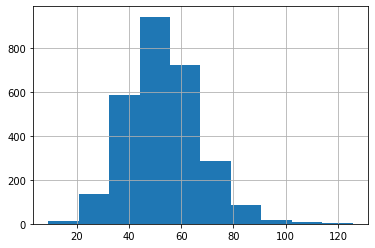

In [ ]:
#Drop method

dropped = fullpopdf.copy() 

for i, r in dropped.iterrows():
    if r.Mortality_Rate == '*' :
        dropped = dropped.drop(i, axis =0)

    

sorted(dropped.Mortality_Rate.unique())
dropped.Mortality_Rate.astype(float).hist()
#dropped[dropped.Mortality_Rate == '*']  

### 1.6 Reformat the rest of the columns specified in 1.3 to numerical [5 Marks]
In each column reformat all the cells that you can. 

*Hint*: You can keep the cells that you cannot reformat until you decide if you want to use the specific column in the model. This is because you want to lose as least data as possible. So you can drop the associated rows if you want to use the column and keep them if the specific column is not used.

Based on unique values output, some data of the Incidence_Rate feature has character '#' at the end, which we assume to be error. We will eliminate '#', which should allow us to reformat the feature to the more appropriate form.

In [ ]:
fullpopdf[fullpopdf['State'] == 'MI'].loc[:,['State','Incidence_Rate']].sample(10)

,State,Incidence_Rate
1264,MI,73.4 #
1247,MI,51.8 #
1229,MI,59.1 #
1306,MI,83
1292,MI,87.3 #
1291,MI,97 #
1307,MI,90.7 #
1300,MI,50.2 #
1279,MI,50.1 #
1284,MI,78.6 #


In [ ]:
#Reformat 'Incident Rate' values that inclue '#' values (mostly for Michigan)
for i, r in dropped.iterrows():
    splitted = r.Incidence_Rate.split()
    dropped.loc[i, 'Incidence_Rate'] = splitted[0]

We are going to reformat the trend column so we can perform the regression. 
For rows that contain * for trend column, we will assign 'stable' to those rows. The reason for that is when we look at the trend based on the states, we find that the majority of the trend is 'stable' for every states that have missing values for trend. Therefore, we will assume that those missing values are 'stable'. We do not want to remove those rows because we want to keep the values for other columns. 

In [ ]:
dropped.groupby('State')['Recent_Trend'].value_counts()

State  Recent_Trend
AK     stable          12
AL     stable          62
       falling          5
AR     stable          72
       falling          3
                       ..
WV     stable          53
       falling          1
       rising           1
WY     stable          20
       falling          1
Name: Recent_Trend, Length: 121, dtype: int64

In [ ]:
#Reformat available 'Recent_Trend' values to categorized objects
for i, r in dropped.iterrows():
    if r.Recent_Trend == 'stable' or r.Recent_Trend == '*':
        dropped.loc[i, 'Recent_Trend'] = '0'
    elif r.Recent_Trend == 'rising':
        dropped.loc[i, 'Recent_Trend'] = '1'
    elif r.Recent_Trend == 'falling':
        dropped.loc[i, 'Recent_Trend'] = '-1'
dropped.Recent_Trend.unique()

array(['0', '-1', '1', '_', '__'], dtype=object)

Next, we examine the average annual incidence column because this contains lots of missing values.

In [ ]:
dropped[dropped.Avg_Ann_Incidence == '_'].sample(10)

,FIPS,State,AreaName,All_Poverty,M_Poverty,F_Poverty,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015
953,20143,KS,"Ottawa County, Kansas",466,217,249,52479.0,2770,302,2607,274,5377,576,_,_,_,46.4,4,5975
1387,27159,MN,"Wadena County, Minnesota",2211,979,1232,41906.0,6044,661,6338,424,12382,1085,_,_,_,43.8,10,13875
921,20079,KS,"Harvey County, Kansas",4415,1785,2630,51327.0,15195,1596,15987,1423,31182,3019,_,_,_,41.4,20,35073
882,20001,KS,"Allen County, Kansas",2257,957,1300,38698.0,5602,779,5754,741,11356,1520,_,_,_,52.2,10,12717
1329,27043,MN,"Faribault County, Minnesota",1878,814,1064,47540.0,6459,557,6437,466,12896,1023,_,_,_,43.1,10,14050
1362,27109,MN,"Olmsted County, Minnesota",13237,5835,7402,68023.0,66247,5093,71931,3469,138178,8562,_,_,_,32.3,50,151436
1355,27095,MN,"Mille Lacs County, Minnesota",3080,1382,1698,49094.0,11568,1188,11699,896,23267,2084,_,_,_,56.2,19,25788
925,20087,KS,"Jefferson County, Kansas",1394,592,802,57236.0,8420,1072,8561,588,16981,1660,_,_,_,47.7,12,18930
1347,27079,MN,"Le Sueur County, Minnesota",2482,1203,1279,60632.0,13150,806,12839,735,25989,1541,_,_,_,38,13,27663
1348,27081,MN,"Lincoln County, Minnesota",524,207,317,49575.0,2669,198,2607,169,5276,367,_,_,_,36.2,4,5771


In [ ]:
dropped[dropped.Avg_Ann_Incidence == '__'].sample(10)

,FIPS,State,AreaName,All_Poverty,M_Poverty,F_Poverty,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015
1973,32033,NV,"White Pine County, Nevada",987,381,606,57122.0,3873,526,3532,731,7405,1257,__,__,__,46.1,6,9811
1958,32001,NV,"Churchill County, Nevada",3802,1765,2037,47415.0,9756,1871,9845,1873,19601,3744,__,__,__,59.9,18,24200
1974,32510,NV,"Carson City, Nevada",8787,3992,4795,47668.0,21461,4907,22411,3802,43872,8709,__,__,__,51.8,39,54521
1964,32013,NV,"Humboldt County, Nevada",1762,802,960,65212.0,7339,1429,6497,1574,13836,3003,__,__,__,48.4,7,17019
1961,32007,NV,"Elko County, Nevada",5574,2675,2899,71799.0,22496,3962,20493,3991,42989,7953,__,__,__,39.9,15,51935
1960,32005,NV,"Douglas County, Nevada",4984,2264,2720,58535.0,19911,3602,20431,2952,40342,6554,__,__,__,40.9,32,47710
1968,32021,NV,"Mineral County, Nevada",907,429,478,38923.0,1926,446,1816,296,3742,742,__,__,__,63.6,5,4478
1970,32027,NV,"Pershing County, Nevada",832,350,482,45230.0,1995,525,1846,413,3841,938,__,__,__,61,4,6634
1967,32019,NV,"Lyon County, Nevada",8482,3749,4733,47255.0,21106,4645,21605,3982,42711,8627,__,__,__,61.2,41,52585
1972,32031,NV,"Washoe County, Nevada",65248,30454,34794,52870.0,176960,39625,183055,32403,360015,72028,__,__,__,41.7,182,446903


In [ ]:
dropped[dropped.Avg_Ann_Incidence == '*'].head()

,FIPS,State,AreaName,All_Poverty,M_Poverty,F_Poverty,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015


In [ ]:
dropped[dropped.Avg_Ann_Incidence == '3 or fewer'].head()

,FIPS,State,AreaName,All_Poverty,M_Poverty,F_Poverty,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015
1767,38039,ND,"Griggs County, North Dakota",179,78,101,48355.0,1047,98,1002,91,2049,189,*,3 or fewer,0,76.8,4,2314
1882,31163,NE,"Sherman County, Nebraska",411,126,285,46366.0,1379,133,1430,107,2809,240,*,3 or fewer,0,66.1,3,3091
2414,46121,SD,"Todd County, South Dakota",4471,2116,2355,31128.0,3268,1556,3624,1455,6892,3011,*,3 or fewer,0,64.7,3,9959
2746,48461,TX,"Upton County, Texas",657,278,379,46131.0,1214,378,1316,439,2530,817,*,3 or fewer,0,89.1,3,3651
2913,51685,VA,"Manassas Park city, Virginia",1232,646,586,73528.0,5839,2304,5675,1721,11514,4025,*,3 or fewer,0,42,4,15726


We decide to drop rows that contain missing values of average annual incidence because for most of those rows, we also do not have values for incidence rate to do a rough estimation for the average annual incidence based on the population and 100,000 scale. Since we cannot assign values to those rows since that might create misleading data, we decide to drop those rows. 

In [ ]:
#Reformat the remaining '*' values and drop rows with '_' values
for i, r in dropped.iterrows():
    if r.Avg_Ann_Incidence == '_' or r.Avg_Ann_Incidence == '__' or r.Avg_Ann_Incidence == '3 or fewer' or r.Avg_Ann_Deaths == '*':
        dropped = dropped.drop(i, axis =0)
    if ',' in r.Avg_Ann_Deaths:
        dropped.loc[i, ['Avg_Ann_Deaths']] = r.Avg_Ann_Deaths.replace(',','')

In [ ]:
#Convert types
dropped.Recent_Trend = dropped.Recent_Trend.astype(int)
dropped.Incidence_Rate = dropped.Incidence_Rate.astype(float)
dropped.Avg_Ann_Incidence = dropped.Avg_Ann_Incidence.astype(float)
dropped.Mortality_Rate = dropped.Mortality_Rate.astype(float)
dropped.Avg_Ann_Deaths  = dropped.Avg_Ann_Deaths.astype(float)

In [ ]:
#Check unique values
formatted_col = ['Incidence_Rate','Recent_Trend','Avg_Ann_Incidence','Avg_Ann_Deaths','Mortality_Rate']

for col in formatted_col:
  print(f'Reformatted values for {col}: {sorted(dropped[col].unique())}')


Reformatted values for Incidence_Rate: [13.5, 14.8, 15.8, 18.2, 18.5, 20.4, 22.9, 23.7, 25.0, 26.5, 27.6, 28.3, 28.8, 29.2, 29.3, 29.5, 29.7, 30.3, 31.5, 31.7, 32.0, 32.1, 32.5, 32.7, 32.9, 33.6, 33.9, 34.0, 34.4, 34.5, 34.7, 34.8, 35.0, 35.1, 35.4, 35.5, 35.7, 35.8, 36.0, 36.1, 36.3, 36.4, 36.6, 36.7, 36.8, 36.9, 37.0, 37.1, 37.2, 37.3, 37.6, 38.1, 38.2, 38.4, 38.5, 38.6, 38.7, 38.8, 39.2, 39.3, 39.4, 39.5, 39.6, 39.7, 39.9, 40.0, 40.2, 40.4, 40.5, 40.6, 40.7, 40.8, 40.9, 41.0, 41.1, 41.3, 41.5, 41.6, 41.7, 41.8, 41.9, 42.0, 42.1, 42.3, 42.4, 42.5, 42.6, 42.7, 42.8, 43.1, 43.2, 43.3, 43.4, 43.7, 43.8, 43.9, 44.0, 44.1, 44.2, 44.3, 44.4, 44.5, 44.7, 44.8, 44.9, 45.0, 45.1, 45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.9, 46.0, 46.1, 46.2, 46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47.0, 47.2, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8, 47.9, 48.0, 48.1, 48.2, 48.3, 48.4, 48.5, 48.6, 48.7, 48.8, 48.9, 49.0, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50.0, 50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 

### 1.7 Make the numerical data useful [5 Marks]
We know we have many columns of data, some of them are dependent on the populations. As a *Hint*, convert all the raw data to per 100,000 persons rates (divide by population and multiply by 100,000).

In [ ]:
data_dict

,Unnamed: 0,Feature,Definition,Notes
0,0,State,NaN,NaN
1,1,AreaName,NaN,NaN
2,2,All_Poverty,Both male and female reported below poverty li...,NaN
3,3,M_Poverty,Males below poverty (Raw),NaN
4,4,F_Poverty,Females below poverty (Raw),NaN
5,5,FIPS,State + County FIPS (Raw),NaN
6,6,Med_Income,Med_Income all enthnicities (Raw),NaN
7,7,Med_Income_White,Med_Income white (Raw),NaN
8,8,Med_Income_Black,Med_Income black (Raw),NaN
9,9,Med_Income_Nat_Am,Med_Income native American (Raw),NaN


In [ ]:
percentdf_col = ['All_Poverty','M_Poverty','F_Poverty','M_With','F_With','M_Without','F_Without','All_With','All_Without','Avg_Ann_Incidence','Avg_Ann_Deaths', 'Med_Income','POPESTIMATE2015']
percentdf = dropped.copy()
for col in percentdf_col:
    percentdf[col] = round((percentdf[col]/percentdf.POPESTIMATE2015)*100000,2)

percentdf.sample(10)

,FIPS,State,AreaName,All_Poverty,M_Poverty,F_Poverty,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015
1224,23031,ME,"York County, Maine",9540.24,3813.71,5726.53,28791.22,42734.72,5160.34,46875.51,3658.62,89610.23,8818.95,71.7,92.96,0,48.3,63.13,100000.0
98,05017,AR,"Chicot County, Arkansas",30697.38,12242.68,18454.70,262201.87,37716.51,7517.91,44753.79,6919.38,82470.30,14437.29,76.4,108.82,0,70.2,108.82,100000.0
138,05097,AR,"Montgomery County, Arkansas",18060.20,8115.94,9944.26,368305.46,40189.52,9821.63,43088.07,7859.53,83277.59,17681.16,67.5,122.63,0,50.4,89.19,100000.0
2432,47023,TN,"Chester County, Tennessee",20124.78,9037.83,11086.94,229906.70,40020.61,7166.16,44376.40,7160.44,84397.00,14326.60,76.7,91.58,1,48.5,57.24,100000.0
1982,36015,NY,"Chemung County, New York",14980.88,6202.98,8777.89,57791.92,42695.04,3292.72,47298.18,3161.79,89993.22,6454.50,77.0,101.07,0,56.2,75.80,100000.0
607,19125,IA,"Marion County, Iowa",9383.07,4382.17,5000.90,164272.84,47242.75,2204.60,47723.31,1943.29,94966.06,4147.89,57.4,72.09,0,43.6,54.06,100000.0
3121,56021,WY,"Laramie County, Wyoming",9646.73,3888.96,5757.77,62505.53,41277.38,5727.91,43036.01,5138.95,84313.38,10866.86,52.1,54.57,-1,42.3,43.25,100000.0
1267,26085,MI,"Lake County, Michigan",27696.08,13209.03,14487.04,266447.83,41955.53,6608.89,43251.05,4989.50,85206.58,11598.39,77.4,140.06,0,66.8,122.55,100000.0
1666,37037,NC,"Chatham County, North Carolina",12746.73,6414.96,6331.77,79858.45,38436.16,7548.50,42335.89,5698.74,80772.05,13247.24,53.0,73.31,0,38.5,54.99,100000.0
2861,51133,VA,"Northumberland County, Virginia",11052.98,4390.12,6662.85,424174.30,44498.04,4038.59,47956.18,4095.81,92454.22,8134.40,71.6,163.51,0,52.3,114.45,100000.0


In [ ]:
percentdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2641 entries, 2 to 3133
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FIPS               2641 non-null   object 
 1   State              2641 non-null   object 
 2   AreaName           2641 non-null   object 
 3   All_Poverty        2641 non-null   float64
 4   M_Poverty          2641 non-null   float64
 5   F_Poverty          2641 non-null   float64
 6   Med_Income         2641 non-null   float64
 7   M_With             2641 non-null   float64
 8   M_Without          2641 non-null   float64
 9   F_With             2641 non-null   float64
 10  F_Without          2641 non-null   float64
 11  All_With           2641 non-null   float64
 12  All_Without        2641 non-null   float64
 13  Incidence_Rate     2641 non-null   float64
 14  Avg_Ann_Incidence  2641 non-null   float64
 15  Recent_Trend       2641 non-null   int64  
 16  Mortality_Rate     2641 

In [ ]:
percentdf.describe()

,All_Poverty,M_Poverty,F_Poverty,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015
count,2641.000000,2641.000000,2641.000000,2.641000e+03,2641.000000,2641.000000,2641.000000,2641.000000,2641.000000,2641.000000,2641.000000,2641.000000,2641.000000,2641.000000,2641.000000,2641.0
mean,16473.672639,7351.934362,9121.738353,2.014529e+05,40857.108614,6871.752336,43259.346918,6095.752117,84116.455672,12967.504377,70.095721,89.638311,-0.059826,53.590193,68.500507,100000.0
std,6135.344154,2833.011679,3419.095264,2.095360e+05,3455.361419,2440.521064,3319.664475,2441.797152,6337.840882,4767.769801,17.685465,29.702046,0.292939,14.115343,24.002369,0.0
min,2598.620000,892.600000,1706.020000,5.525500e+02,19081.360000,1194.930000,24291.500000,926.410000,43907.380000,2160.560000,13.500000,9.740000,-1.000000,9.200000,5.800000,100000.0
25%,12039.890000,5322.620000,6679.450000,5.736668e+04,38869.050000,5136.840000,41679.740000,4295.240000,80901.780000,9440.150000,58.500000,70.020000,0.000000,44.200000,51.560000,100000.0
50%,15897.440000,7089.970000,8738.620000,1.334855e+05,41162.710000,6628.940000,43780.700000,5857.840000,85009.990000,12609.110000,69.500000,88.130000,0.000000,53.000000,67.530000,100000.0
75%,20072.720000,8973.000000,11036.820000,2.712403e+05,43239.320000,8291.370000,45490.710000,7559.330000,88483.250000,15843.600000,80.000000,107.960000,0.000000,61.800000,82.910000,100000.0
max,46489.940000,21173.720000,26455.310000,1.473100e+06,50036.130000,20770.960000,51335.370000,21064.020000,96720.590000,41562.520000,203.700000,229.760000,1.000000,125.600000,179.330000,100000.0


## **Part 2: Exploratory analysis [15 Marks]**

### 2.1 Visualizing different features [5 Marks]
Here, show different feature and how they change with respect to each other.
*Hint*: A good function to use here is `sns.pairplot`. Remember to have the plots labeled properly so that they are self explanatory.


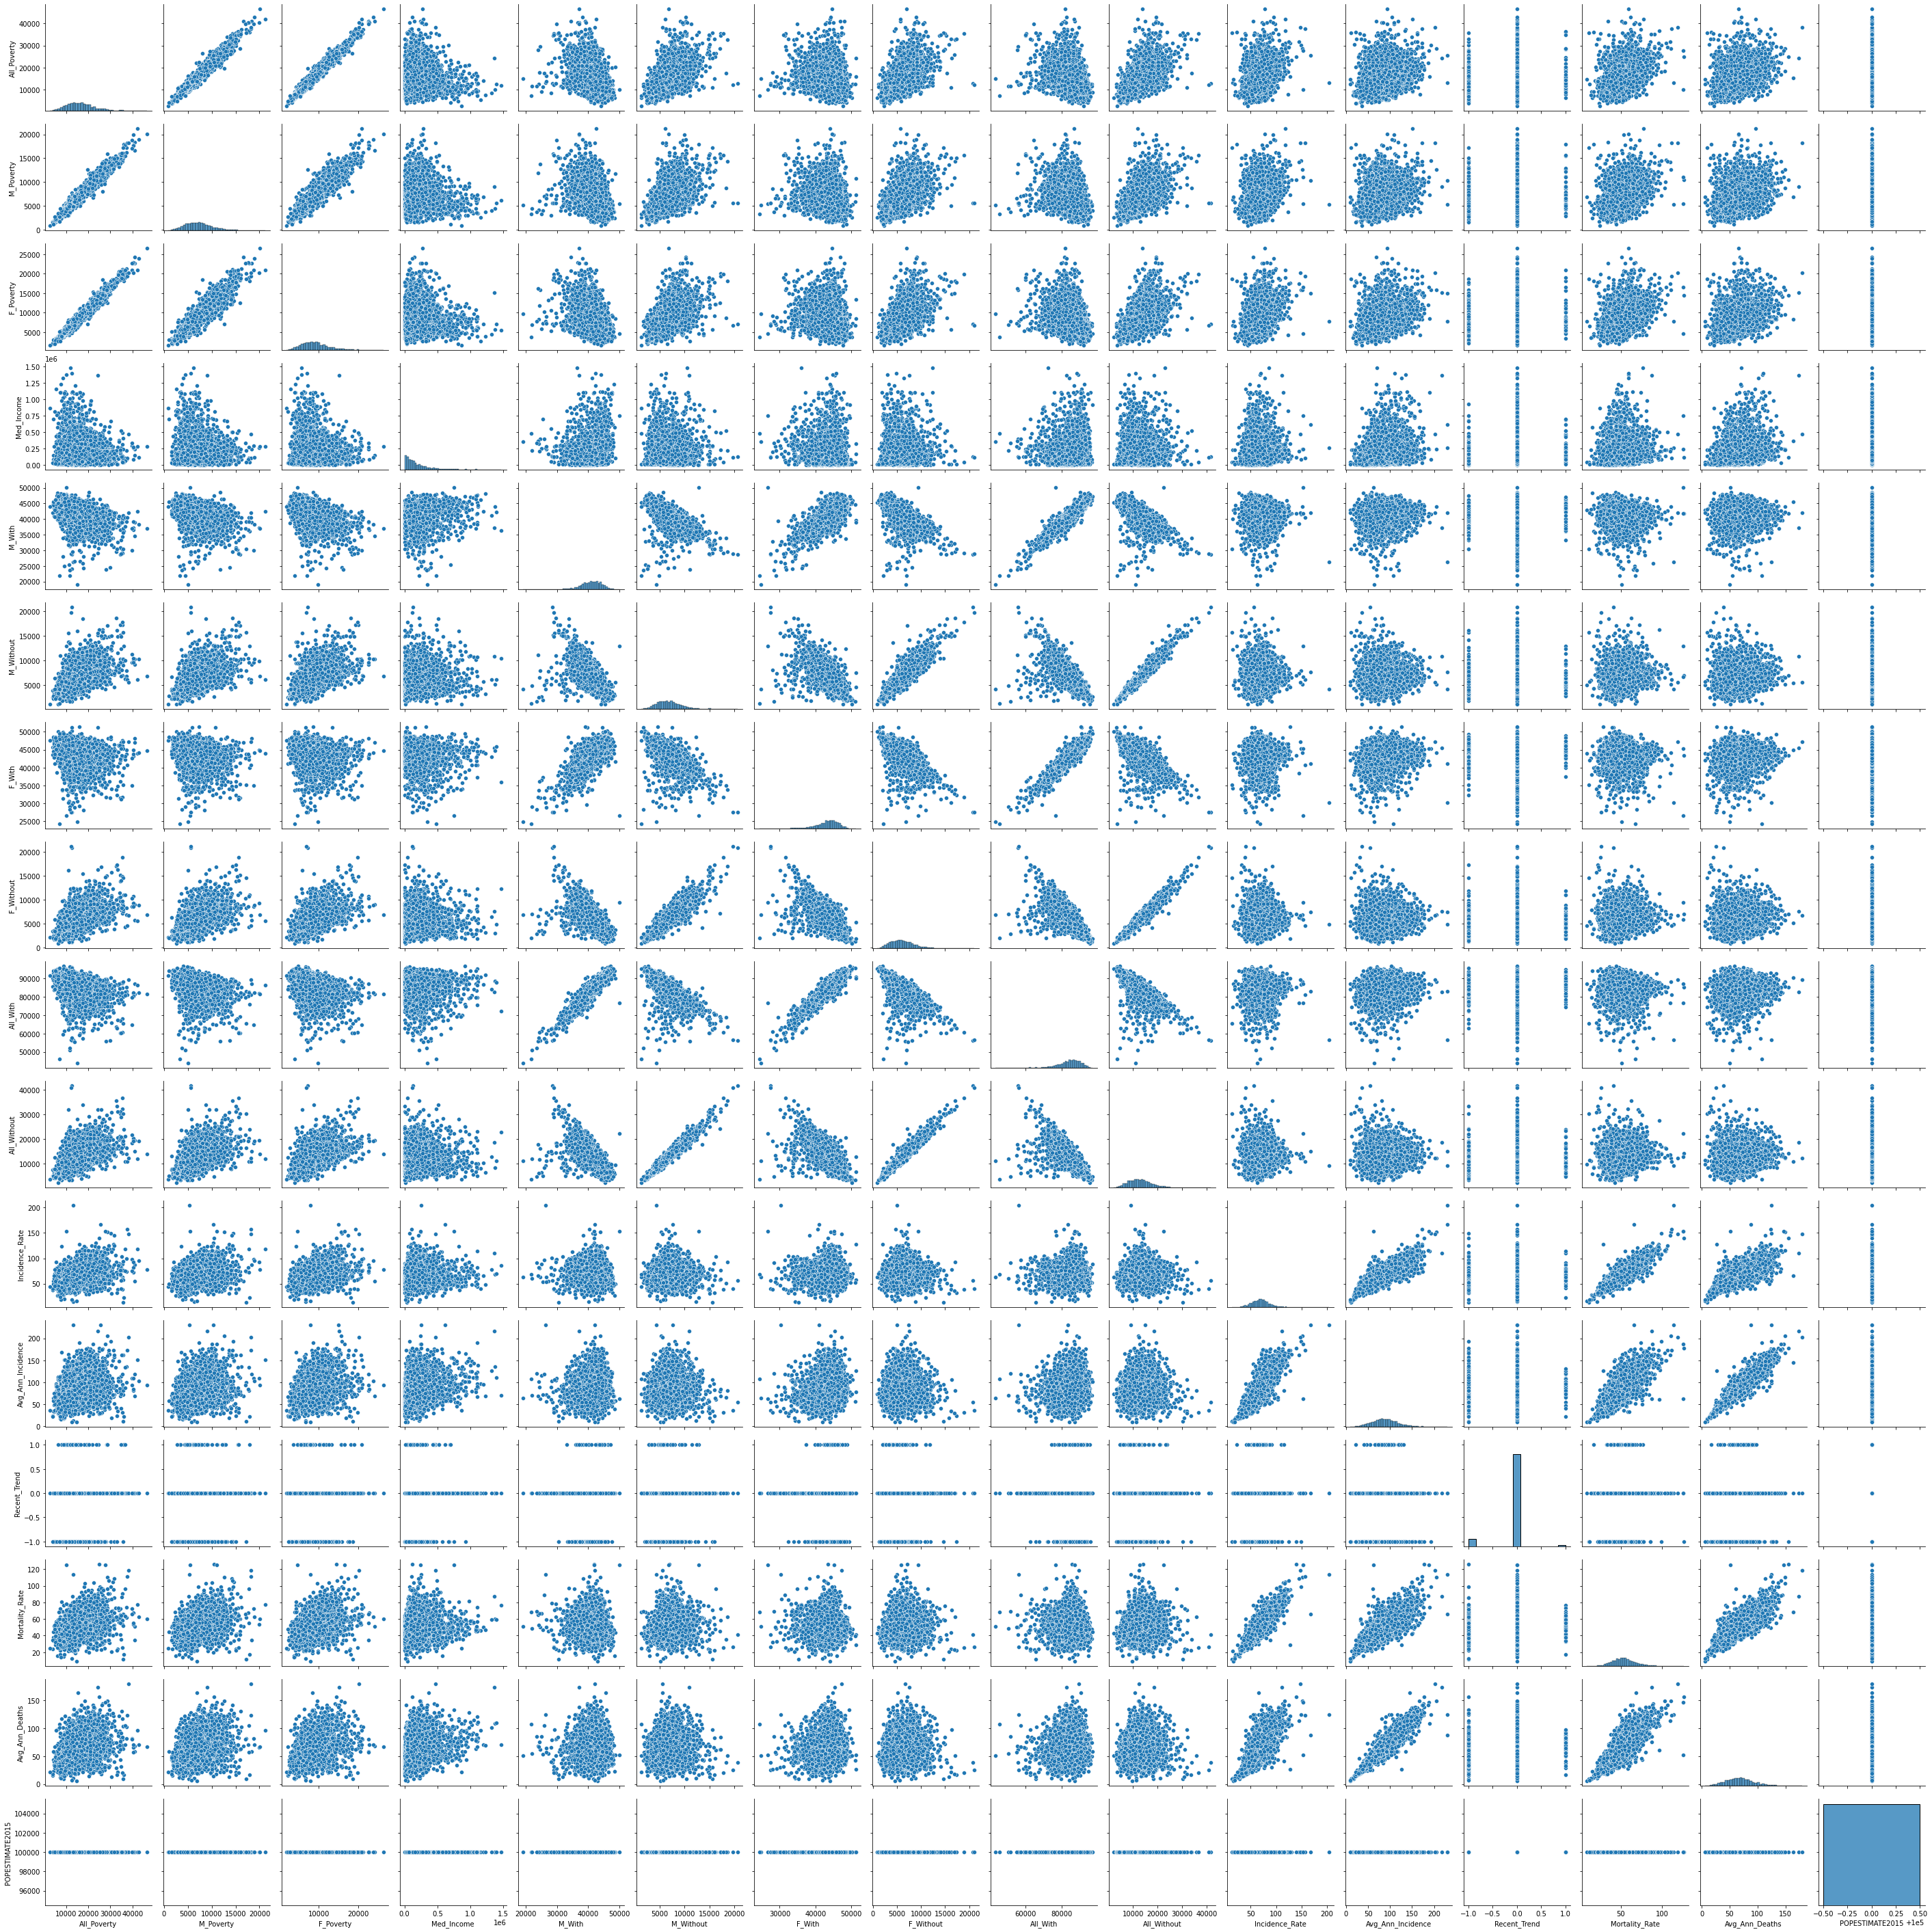

In [ ]:
sns.pairplot(percentdf)

### 2.2 Selecting the most important features [10 Marks]
In this step, we want to remove the redundant features. 

*Hint*: This can be done by analyzing the correlation between the features and removing the highly correlated features. Remember, throughout the project, write down specific reasons for any desicion you make.

In [ ]:
corr = percentdf.corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,All_Poverty,M_Poverty,F_Poverty,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015
All_Poverty,1.000000,0.977424,0.984556,-0.078031,-0.407892,0.547748,-0.203212,0.535482,-0.328820,0.554626,0.328699,0.284926,0.068789,0.387607,0.320510,nan
M_Poverty,0.977424,1.000000,0.925339,-0.077542,-0.370447,0.549749,-0.216938,0.512243,-0.315595,0.543749,0.307363,0.267754,0.066638,0.362074,0.299832,nan
F_Poverty,0.984556,0.925339,1.000000,-0.075771,-0.424989,0.527384,-0.184899,0.536451,-0.328549,0.544698,0.335153,0.289425,0.068221,0.395526,0.326699,nan
Med_Income,-0.078031,-0.077542,-0.075771,1.000000,0.092841,0.036769,-0.117379,0.037142,-0.010865,0.037843,0.002062,0.249956,0.138114,0.042536,0.274744,nan
M_With,-0.407892,-0.370447,-0.424989,0.092841,1.000000,-0.659293,0.750112,-0.663990,0.938093,-0.677539,-0.062958,0.072565,0.008387,-0.099989,0.048288,nan
M_Without,0.547748,0.549749,0.527384,0.036769,-0.659293,1.000000,-0.633355,0.907253,-0.691185,0.976526,0.043377,0.017517,0.014945,0.126599,0.068009,nan
F_With,-0.203212,-0.216938,-0.184899,-0.117379,0.750112,-0.633355,1.000000,-0.685460,0.932742,-0.675257,0.036592,0.134907,-0.034784,-0.021102,0.103013,nan
F_Without,0.535482,0.512243,0.536451,0.037142,-0.663990,0.907253,-0.685460,1.000000,-0.721038,0.976551,0.041195,0.008183,0.030791,0.132367,0.067062,nan
All_With,-0.328820,-0.315595,-0.328549,-0.010865,0.938093,-0.691185,0.932742,-0.721038,1.000000,-0.723080,-0.015158,0.110224,-0.013647,-0.065567,0.080283,nan
All_Without,0.554626,0.543749,0.544698,0.037843,-0.677539,0.976526,-0.675257,0.976551,-0.723080,1.000000,0.043302,0.013158,0.023420,0.132595,0.069158,nan


We decide to drop male below poverty (M_Poverty) and female below poverty (F_Poverty) because they are highly correlated to poverty of all (All_Poverty). Similarly, we drop male without insurance (M_Without) and female without insurance (F_Without) because those are highly correlated with all without insurance (All_Without). We drop male with insurance (M_With) and female with insurance (F_With) because those are highly correlated with all with insurance (All_With).

In [ ]:
simpfeatdf = percentdf.copy()
simpfeatdf = simpfeatdf.drop(['M_Poverty','F_Poverty','M_With','F_With','F_Without','M_Without','POPESTIMATE2015'], axis=1)
corr2 = simpfeatdf.corr()
corr2.style.background_gradient(cmap='coolwarm')

,All_Poverty,Med_Income,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths
All_Poverty,1.000000,-0.078031,-0.328820,0.554626,0.328699,0.284926,0.068789,0.387607,0.320510
Med_Income,-0.078031,1.000000,-0.010865,0.037843,0.002062,0.249956,0.138114,0.042536,0.274744
All_With,-0.328820,-0.010865,1.000000,-0.723080,-0.015158,0.110224,-0.013647,-0.065567,0.080283
All_Without,0.554626,0.037843,-0.723080,1.000000,0.043302,0.013158,0.023420,0.132595,0.069158
Incidence_Rate,0.328699,0.002062,-0.015158,0.043302,1.000000,0.788909,0.065198,0.866994,0.669426
Avg_Ann_Incidence,0.284926,0.249956,0.110224,0.013158,0.788909,1.000000,0.092511,0.719002,0.914501
Recent_Trend,0.068789,0.138114,-0.013647,0.023420,0.065198,0.092511,1.000000,0.062893,0.089621
Mortality_Rate,0.387607,0.042536,-0.065567,0.132595,0.866994,0.719002,0.062893,1.000000,0.797299
Avg_Ann_Deaths,0.320510,0.274744,0.080283,0.069158,0.669426,0.914501,0.089621,0.797299,1.000000


## **Part 3: Regression Model Construction [30 Marks]**

### 3.1 Splitting the dataset [5 Marks] 

Split the dataset to three parts: train, validation, and test. You choose the ratios for the three datasets and provide a one-sentence rationale on why you went with such ratios.

*Hint*: You can use the validation set approach from ch5 lab (google colab).

Because there are several hyperparameters, the machine learning model requires a large enough validation set to test the model performance based on the training set and large enough hold-out set to test the best model's performance to ensure there is not overfitting/underfitting. Therefore, the ratio is 50:25:25.   

(Base code is taken from class materials)

---



In [ ]:
#Shuffle data & reset index
simpfeatdf = simpfeatdf.sample(frac=1).reset_index(drop=True)
simpfeatdf.head()

,FIPS,State,AreaName,All_Poverty,Med_Income,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths
0,39173,OH,"Wood County, Ohio",13459.49,41298.85,92036.54,6357.05,53.3,56.27,0,45.0,47.02
1,33017,NH,"Strafford County, New Hampshire",10247.98,47869.90,87270.65,10434.06,75.0,75.69,0,53.3,53.62
2,34003,NJ,"Bergen County, New Jersey",7241.19,9142.83,87240.47,10838.50,50.9,61.80,-1,34.7,42.83
3,31081,NE,"Hamilton County, Nebraska",8487.49,645386.29,91762.79,5701.85,48.0,65.29,0,34.1,43.53
4,01081,AL,"Lee County, Alabama",22014.36,28389.80,84920.35,10011.91,59.4,45.22,0,57.1,42.04


In [ ]:
#Split test (hold-out) dataset
testdf = simpfeatdf[int(0.75*len(simpfeatdf)):len(simpfeatdf)]
print(len(testdf))

661


In [ ]:
#Split training & validation dataset
fitdf = simpfeatdf[0:int(0.75*len(simpfeatdf))]
print(len(fitdf))

1980


In [ ]:
#Randomize training dataset
np.random.seed(1)
traindf = np.random.choice(fitdf.shape[0], int(2*fitdf.shape[0]/3), replace=False)
print(len(traindf))

1320


In [ ]:
# Creating a binary indicator for samples that are selected for training
select = np.in1d(range(fitdf.shape[0]), traindf)
print(select)

[ True  True  True ...  True False False]


### 3.2 Model training [15 Marks]
Create three different models, using different features (and optionally nonlinear transformations). The purpose of these models is to predict mortality rate of lung cancer with reasonably high R2 (at least exceeding 70%) using a carefully chosen and justified set of features. Use the visualizations from section 2.1 to inform the feature selection for each model.

(Base code is taken from class material)

---
**1st model:** We start with the features that have the highest correlation with the response variable: number of incidence, without insurance, poverty, and the rate of incidence. We also make sure that those features are not highly correlated to each other to avoid collinearity. For this model, we decide not to include annual cases of deaths because the model might be overfitting (R-square is 0.973 when we include annual number of deaths in this model). 

In [ ]:
# Model 1
lm1 = smf.ols('Mortality_Rate~ Incidence_Rate + All_Poverty + Avg_Ann_Incidence + All_Without', data = fitdf[select]).fit()
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        05:36:20   Log-Likelihood:                -4349.8
No. Observations:                1320   AIC:                             8710.
Df Residuals:                    1315   BIC:                             8736.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.3517      0.85

**2nd model:** This model is fairly similar to the first model, except that we substitute All_Poverty with Med_Income. The latter feature is fairly intesting because it seems to have a minor degree of polymonial relationship with Mortality_Rate, and slightly skewed in 2.1. Hence, we apply power-transformation to this feature.

In [ ]:
# Model 2
lm2 = smf.ols('Mortality_Rate~ Med_Income + I(Med_Income**2) + Incidence_Rate + All_Without + Avg_Ann_Deaths', data = fitdf[select]).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1520.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        05:36:21   Log-Likelihood:                -4110.0
No. Observations:                1320   AIC:                             8232.
Df Residuals:                    1314   BIC:                             8263.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.5602      0

**3rd Model:** This model is also fairly similar to the 1st model. However, we believe Avg_Ann_Incidence might be redundant if there is already Incidence_Rate. Instead, we replace it with Avg_Ann_Deaths, which has a high linear relationship with Mortalitiy Rate.

In [ ]:
# Model 3
lm3 = smf.ols('Mortality_Rate~ All_Without  * All_Poverty + Avg_Ann_Deaths + Incidence_Rate', data = fitdf[select]).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     1486.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        05:36:21   Log-Likelihood:                -4122.9
No. Observations:                1320   AIC:                             8258.
Df Residuals:                    1314   BIC:                             8289.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### 3.3 Model selection [10 Marks]
Using different model selection criteria and validation dataset, choose the single best perfoming model among the three models.

In [ ]:
mse_list = []
for model in [lm1, lm2, lm3]:
  preds = model.predict(fitdf)
  square_error= (fitdf['Mortality_Rate'] - preds)**2
  mse = np.mean(square_error[~select])
  mse_list.append(mse)


mod_performance = pd.DataFrame(columns = ['MSE','R2'], index = ['lm1','lm2','lm3'])
mod_performance['MSE'] = mse_list
mod_performance['R2'] = [lm1.rsquared,lm2.rsquared,lm3.rsquared]
print('Model perfromance comparision by validation MSE and R2')
print(mod_performance)

Model perfromance comparision by validation MSE and R2
           MSE        R2
lm1  48.324365  0.788048
lm2  30.982214  0.852629
lm3  31.589695  0.849704


The **model 2** gives us the lowest MSE and highest R-square, so we will choose this one as the best model.

## **Part 4: Model diagnostics [10 marks]**
Explore model collinearity with `variance_inflation_factor`. Larger values of VIF indicate multicollinearity. Remove the problematic features and refit the model. Report how model R-squared is affected.

*Hint:* Consider VIF > 10 as an indicator of multicollinearity. If the VIF for all your features is below 10, it is a positive indication that the level of collinearity is acceptably low without any changes to the model needed in this step.

For the chosen model, Avg_Ann_Deaths and Incidence_Rate both have VIF >10. This indicates that these 2 features are highly correlated to each other, thus inflating the performance of the model. This is true to real life context, since death rate is always a portion of incidence rate.

In [ ]:
# Model 2
from statsmodels.stats.outliers_influence import variance_inflation_factor

Y = fitdf[['Med_Income','All_Without', 'Avg_Ann_Deaths', 'Incidence_Rate']]
vif_data = pd.DataFrame()
vif_data["feature"] = Y.columns
vif_data["VIF"] = [variance_inflation_factor(Y.values, i)
                          for i in range(len(Y.columns))]

print(vif_data)

          feature        VIF
0      Med_Income   2.165073
1     All_Without   6.177193
2  Avg_Ann_Deaths  18.953553
3  Incidence_Rate  21.146262


Therefore, we decide to drop Incidence_Rate, which has the highest inflation value. The resulting VIF returns to acceptable level (VIF <10).

In [ ]:
# Model 2 - Remove Incidence_Rate

Y = fitdf[['Med_Income','All_Without', 'Avg_Ann_Deaths']]
vif_data = pd.DataFrame()
vif_data["feature"] = Y.columns
vif_data["VIF"] = [variance_inflation_factor(Y.values, i)
                          for i in range(len(Y.columns))]

print(vif_data)

          feature       VIF
0      Med_Income  2.077017
1     All_Without  4.874814
2  Avg_Ann_Deaths  5.616764


It is expected that R2 is reduced after dropping Incidence_Rate, because its multicolinearity with Avg_Ann_Deaths inflates the model's variance of regression coefficient.

However, the reduced R2 is still at an acceptable level (R2 > 70%).

In [ ]:
# Refit model 2
lm2x = smf.ols('Mortality_Rate~ Med_Income + I(Med_Income**2) +  All_Without + Avg_Ann_Deaths', data = fitdf[select]).fit()
print(lm2x.summary())

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     614.3
Date:                Fri, 10 Feb 2023   Prob (F-statistic):          5.34e-299
Time:                        05:44:44   Log-Likelihood:                -4678.3
No. Observations:                1320   AIC:                             9367.
Df Residuals:                    1315   BIC:                             9392.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             19.9007      0

## **Part 5: Reporting test performance [5 marks]**
Report the MSE of the final regression model using the test set.

In [ ]:
preds2x = lm2x.predict(fitdf)
square_error2x = (fitdf['Mortality_Rate'] - preds2x)**2
mse2x = np.mean(square_error2x[~select])
print('--------Validation MSE for linear regression model--------')
print('MSE:',mse2x)

--------Validation MSE for linear regression model--------
MSE: 61.66293093814382


## **Part 6: Alternative predictive model (optional): [20 bonus points up to the maximum mark]**

Use one other supervised learning model to outperform the regression model from part 5 (in terms of MSE) on the same hold-out test set. Document, justify, and explain all your decision w.r.t. the implementation of this alternative predictive model.

This part is deliberately designed without clear instructions as bonus points for efforts of groups in completing a very common ML task without a walkthrough or instrcutions.

Algorithm for linear regression assumes input features to be mutually independent(no co-linearity). However, there was colinearity in our best performing model. Decision trees handles colinearity better than linear regression, so we will give it a try. 

In [ ]:
#Split data
X = percentdf.drop(['Mortality_Rate','FIPS','State','AreaName'], axis=1)
y = percentdf.Mortality_Rate
train_size = 0.5 # we used specific train size before, we can also use a percentage. 
random_state = 0
max_depth = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)

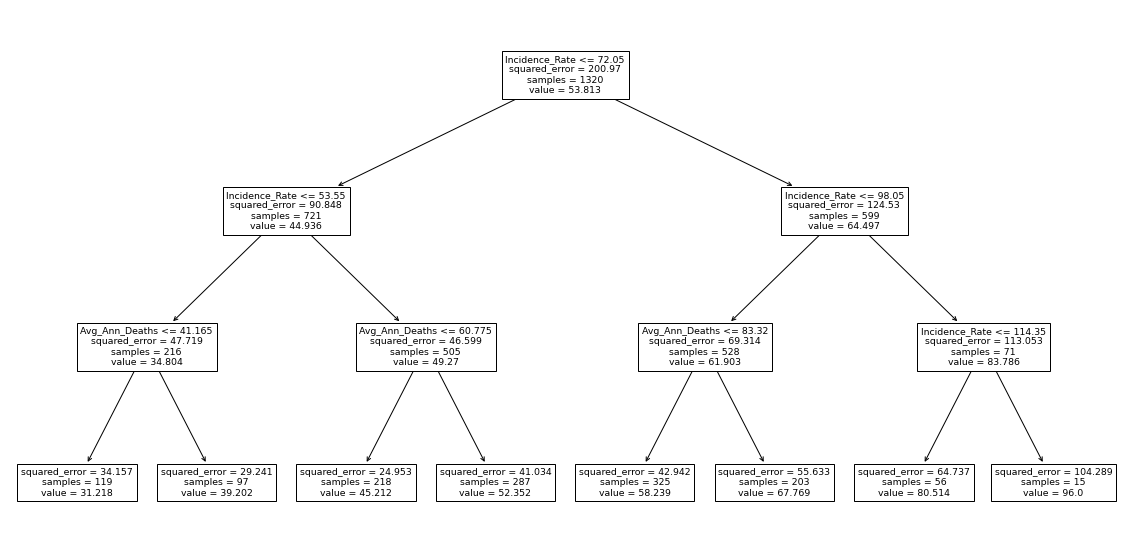

The MSE of Simple tree model is 59.85399507325321


In [ ]:
#Fit Simple tree
regr_simple = DecisionTreeRegressor(max_depth=max_depth)
regr_simple.fit(X_train, y_train)
plt.figure(figsize=(20,10)) 
plot_tree(regr_simple, feature_names = X_train.columns)
plt.show()
y_pred_simple = regr_simple.predict(X_test)
mse_simple = mean_squared_error(y_test, y_pred_simple)
print(f'The MSE of Simple tree model is {mse_simple}')

In [ ]:
# Fit Bagging tree
all_features = X_train.shape[1]
regr_bag = RandomForestRegressor(max_features=all_features, random_state=4)
regr_bag.fit(X_train, y_train)
y_pred_bag = regr_bag.predict(X_test)
mse_bag = mean_squared_error(y_test, y_pred_bag)
print(f'The MSE of Bagging tree model is {mse_bag}')

The MSE of Bagging tree model is 23.76733832929599


In [ ]:
#Fit Random Forest tree
regr_rf = RandomForestRegressor(max_features=3, random_state=1) 
regr_rf.fit(X_train, y_train)

y_pred_rf = regr_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'The MSE of Random Forest tree model is {mse_rf}')

The MSE of Random Forest tree model is 36.452097468584405


In [ ]:

mod_performance2 = pd.DataFrame(columns = ['MSE'], index = ['lm2x','regr_simple','regr_bag','regr_rf']) 
mod_performance2['MSE'] = [mse2x, mse_simple,mse_bag,mse_rf]
print('Model perfromance comparision by validation MSE')
print(mod_performance2)

Model perfromance comparision by validation MSE
                   MSE
lm2x         61.662931
regr_simple  59.853995
regr_bag     23.767338
regr_rf      36.452097


Based on the MSE values, **Bagging model** seems to be a better one compared to Model 2, Simple tree and Random Forest tree model. 

Permutation Importance also shows that the Bagging tree also places higher weight for Incidence_rate, Avg_Ann_Deaths, Avg_Ann_Incidence in building the model, similar to the aforementioned linear regression models. However, All_Without is at the lowest levels of importance with this tree model.

In [ ]:
perm = PermutationImportance(regr_bag, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
1.0676 ± 0.0509,Incidence_Rate
0.5391 ± 0.0203,Avg_Ann_Deaths
0.1438 ± 0.0070,Avg_Ann_Incidence
0.0139 ± 0.0022,Med_Income
0.0086 ± 0.0014,F_Poverty
0.0040 ± 0.0003,M_Poverty
0.0037 ± 0.0004,All_Poverty
0.0035 ± 0.0003,F_With
0.0035 ± 0.0003,M_Without
0.0034 ± 0.0005,M_With
